## Generating Phase diagrams with varying paramaters

This notebook shows how to generate the phase-diagrams for protein while varying each parameter over a defined interval. 

In [43]:
## Import all the packages here 

from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import pandas as pd
import numpy as np
from parameters import Parameters # function to generate Parameters object with defined bounds
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import Normalize, LinearSegmentedColormap
import warnings

plt.rcParams["font.family"] = "arial"
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [44]:
## Import the model and define the timescale 

model_degtag = Model(sbml_filename = 'SBML_model_files/Biocrnpyler_model_degtag_050525.xml')
model_no_tag = Model(sbml_filename = 'SBML_model_files/Biocrnpyler_model_no_degtag_050525.xml')

N_steps = 1000
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720  # Time till we want to plot the simulation 

In [45]:
## Wrote a function to pass the parameters of the model 

def run_CRN_model(param, model_degtag, model_no_tag, timepoints): 

    params = param.to_dict() # params is a Parameters object so values of parameters are extracted as a dictinory 

    n = 5.5 # Fixed parameter

    model_degtag.set_species({'dna_sfYFP': 100,
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_nucleotide': params['NT_IC'],
    'protein_AA_aminoacid': params['AA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_sfYFP':0,
    'protein_sfYFP':0,
    'cell_count_count': params['C_0']})

    model_no_tag.set_species({'dna_sfYFP': 100,
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_nucleotide': params['NT_IC'],
    'protein_AA_aminoacid': params['AA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_sfYFP':0,
    'protein_sfYFP':0,
    'cell_count_count': params['C_0']})

    model_degtag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'RNAP_max__bacterial_transcription': params['RNAP_max'],
    'n_gamma_RNAP__bacterial_transcription' : params['n_gamma_RNAP'],
    'Et_max__bacterial_translation': params['Et_max'],
    'n_gamma_Et__bacterial_translation' : params['n_gamma_Et'],
    'Ribo_max__bacterial_translation': params['Ribo_max'],
    'n_gamma_Ribo__bacterial_translation' : params['n_gamma_Ribo'],
    'tRNA_max__bacterial_translation': params['tRNA_max'],
    'n_gamma_tRNA__bacterial_translation' : params['n_gamma_tRNA'],
    'Protease_max__bacterial_translation': params['Protease_max'],
    'n_gamma_Protease__bacterial_translation' : params['n_gamma_Protease'],
    'n_gamma_folding__bacterial_translation' : params['n_gamma_folding'],
    'n_gamma_syn__bacterial_translation' : params['n_gamma_syn'],
   

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__mrna_degradation':params['k_tx_4b'],
    'k_tx_4u__mrna_degradation':params['k_tx_4u'],
    'k_tx_5__mrna_degradation': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2b__bacterial_translation':params['k_tl_2b'],
    'k_tl_3u__bacterial_translation':params['k_tl_3u'],
    'k_tl_3b__bacterial_translation':params['k_tl_3b'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'b_tl_5__bacterial_translation':params['b_tl_5'],
    'k_tl_6__bacterial_translation':params['k_tl_6'],
    'k_tl_7__non_tag_degradation':params['k_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'k_tl_9b_P__bacterial_translation': params['k_tl_9b_P'],
    'k_tl_9b_Pm__bacterial_translation': params['k_tl_9b_Pm'],
    'k_tl_9u__bacterial_translation': params['k_tl_9u'],
    'k_tl_10__bacterial_translation': params['k_tl_10'],

    'n_delta__bacterial_transcription': n, 
    'n_delta__non_tag_degradation': n, 
    'n_delta__mrna_degradation': n})

    model_no_tag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'RNAP_max__bacterial_transcription': params['RNAP_max'],
    'n_gamma_RNAP__bacterial_transcription' : params['n_gamma_RNAP'],
    'Et_max__bacterial_translation': params['Et_max'],
    'n_gamma_Et__bacterial_translation' : params['n_gamma_Et'],
    'Ribo_max__bacterial_translation': params['Ribo_max'],
    'n_gamma_Ribo__bacterial_translation' : params['n_gamma_Ribo'],
    'tRNA_max__bacterial_translation': params['tRNA_max'],
    'n_gamma_tRNA__bacterial_translation' : params['n_gamma_tRNA'],
    'n_gamma_folding__bacterial_translation' : params['n_gamma_folding'],
    'n_gamma_syn__bacterial_translation' : params['n_gamma_syn'],
   

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__mrna_degradation':params['k_tx_4b'],
    'k_tx_4u__mrna_degradation':params['k_tx_4u'],
    'k_tx_5__mrna_degradation': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2b__bacterial_translation':params['k_tl_2b'],
    'k_tl_3u__bacterial_translation':params['k_tl_3u'],
    'k_tl_3b__bacterial_translation':params['k_tl_3b'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'b_tl_5__bacterial_translation':params['b_tl_5'],
    'k_tl_7__non_tag_degradation':params['k_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'k_tl_10__bacterial_translation': params['k_tl_10'],

    'n_delta__bacterial_transcription': n, 
    'n_delta__non_tag_degradation': n, 
    'n_delta__mrna_degradation': n})

    sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
    sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

    return sol_deg, sol_no_deg

In [46]:
# Load the parameter file 
p = pd.read_csv('model_param_file_030525.csv').to_numpy()
p = p[:,2]

# Function that takes in an array and assigns the parameter values using the Parameters object 
# useful function when we want to define a new parameter array for each iteration of parameter variation

def set_params(p):

    params = Parameters()

    params.add_parameter(name = 'n_gamma_RNAP', value = p[0], min_bound = 0.01, max_bound = 0.9)
    params.add_parameter(name = 'n_gamma_Et', value = p[1], min_bound= 0.01, max_bound = 0.9)
    params.add_parameter(name = 'n_gamma_tRNA', value = p[2]*1 , min_bound = 0.01, max_bound = 0.9)
    params.add_parameter(name = 'n_gamma_Ribo', value = p[3]*1, min_bound = 0.01, max_bound = 0.9)
    params.add_parameter(name = 'n_gamma_Protease', value = p[4]*1, min_bound = 0.01, max_bound = 0.9)

    params.add_parameter(name = "Sigma_IC", value = p[5], min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "NT_IC", value = p[6]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "RNAase_IC", value = p[7]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "AA_IC", value = p[8]*1, min_bound = 1e1, max_bound = 1e6)

    params.add_parameter(name = "Ribo_max", value = p[9]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "tRNA_max", value = p[10]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "RNAP_max", value = p[11]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "Et_max", value = p[12]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = "Protease_max", value = p[13]*1)#, min_bound = 1e1, max_bound = 1e4)


    params.add_parameter(name = 'k_tx_1b', value = p[14]*1, min_bound = 1*1e-3, max_bound = 1*1e-1)
    params.add_parameter(name = 'k_tx_1u', value = p[15], min_bound = 3.71, max_bound = 37.1)
    params.add_parameter(name = 'k_tx_2b', value = p[16]*1 , min_bound = 1.94e-4, max_bound = 1.94e-3)
    params.add_parameter(name = 'k_tx_2u', value = p[17]*1, min_bound = 0.01, max_bound = 0.1)
    params.add_parameter(name = 'k_tx_3', value = p[18]*1, min_bound = 0.001, max_bound = 0.0036)
    params.add_parameter(name = 'k_tx_4b', value = p[19], min_bound = 0.1, max_bound = 5)
    params.add_parameter(name = 'k_tx_4u', value = p[20]*1, min_bound = 100, max_bound = 200)
    params.add_parameter(name = 'k_tx_5', value = p[21]*1, min_bound = 0.1, max_bound = 10)

    params.add_parameter(name = 'k_tl_1b', value = p[22], min_bound = 1e-3, max_bound = 1e1)
    params.add_parameter(name = 'k_tl_1u', value = p[23], min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = 'k_tl_2u', value = p[24],  min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = 'k_tl_2b', value = p[25], min_bound = 1e-3, max_bound = 1e1)
    params.add_parameter(name = 'k_tl_3b', value = p[26]*1,  min_bound = 1e-3, max_bound = 1e0)
    params.add_parameter(name = 'k_tl_3u', value = p[27]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = 'k_tl_4', value = p[28]*1, min_bound = 0.05, max_bound = 1)
    params.add_parameter(name = 'k_tl_5', value = p[29]*1, min_bound = 0.1, max_bound = 0.3)
    params.add_parameter(name = "b_tl_5", value = p[30]*1, min_bound = 0, max_bound = 1)
    params.add_parameter(name = 'k_tl_6', value = p[31]*1, min_bound = 0.01, max_bound = 10)
    params.add_parameter(name = 'k_tl_7', value = p[32]*1, min_bound = 0.0005, max_bound = 0.01)
    params.add_parameter(name = 'k_tl_8', value = p[33]*1, min_bound = 1e1, max_bound = 1e4)
    params.add_parameter(name = 'k_tl_9b_P', value = p[34]*1, min_bound = 1e-4, max_bound = 1e1)
    params.add_parameter(name = 'k_tl_9b_Pm', value = p[35]*1)#, min_bound = 1e-4, max_bound = 1e1)
    params.add_parameter(name = 'k_tl_9u', value =  p[36] * 1)#, min_bound = 1e-1, max_bound = 1e3)
    params.add_parameter(name = 'k_tl_10', value = p[37]*1, min_bound = 1e-4, max_bound = 1e0)
    params.add_parameter(name = 'n_gamma_folding', value = p[38]*1, min_bound = 0.01, max_bound= 0.9)
    params.add_parameter(name = 'n_gamma_syn', value = p[39]*1, min_bound = 0.01, max_bound = 0.9)

    params.add_parameter(name = 'C_max', value = p[40])
    params.add_parameter(name = "C_0", value = p[41])
    params.add_parameter(name = "k_gr", value = p[42])
        
    return params

params = set_params(p)

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


In [47]:
# Print all the parameters in the model to check 

param_dict = params.to_dict()
param_dict

{'n_gamma_RNAP': 0.23,
 'n_gamma_Et': 0.37,
 'n_gamma_tRNA': 0.6,
 'n_gamma_Ribo': 0.67,
 'n_gamma_Protease': 0.455,
 'Sigma_IC': 135.0,
 'NT_IC': 942.0,
 'RNAase_IC': 90.0,
 'AA_IC': 85610.0,
 'Ribo_max': 280.0,
 'tRNA_max': 1535.0,
 'RNAP_max': 1960.0,
 'Et_max': 1090.0,
 'Protease_max': 850.0,
 'k_tx_1b': 0.05061,
 'k_tx_1u': 14.081,
 'k_tx_2b': 0.0019382,
 'k_tx_2u': 0.09999,
 'k_tx_3': 0.003597,
 'k_tx_4b': 2.54926,
 'k_tx_4u': 161.36218,
 'k_tx_5': 0.42521,
 'k_tl_1b': 0.002793,
 'k_tl_1u': 11.48224,
 'k_tl_2u': 35.1135,
 'k_tl_2b': 8.24109,
 'k_tl_3b': 0.04287,
 'k_tl_3u': 12.3438,
 'k_tl_4': 0.17,
 'k_tl_5': 0.10047,
 'b_tl_5': 0.5007,
 'k_tl_6': 0.39,
 'k_tl_7': 0.0008,
 'k_tl_8': 138.0,
 'k_tl_9b_P': 0.000454,
 'k_tl_9b_Pm': 0.01671,
 'k_tl_9u': 10.2873,
 'k_tl_10': 0.0001,
 'n_gamma_folding': 0.26,
 'n_gamma_syn': 0.296,
 'C_max': 503666666.6666667,
 'C_0': 6666666.67,
 'k_gr': 0.015781}

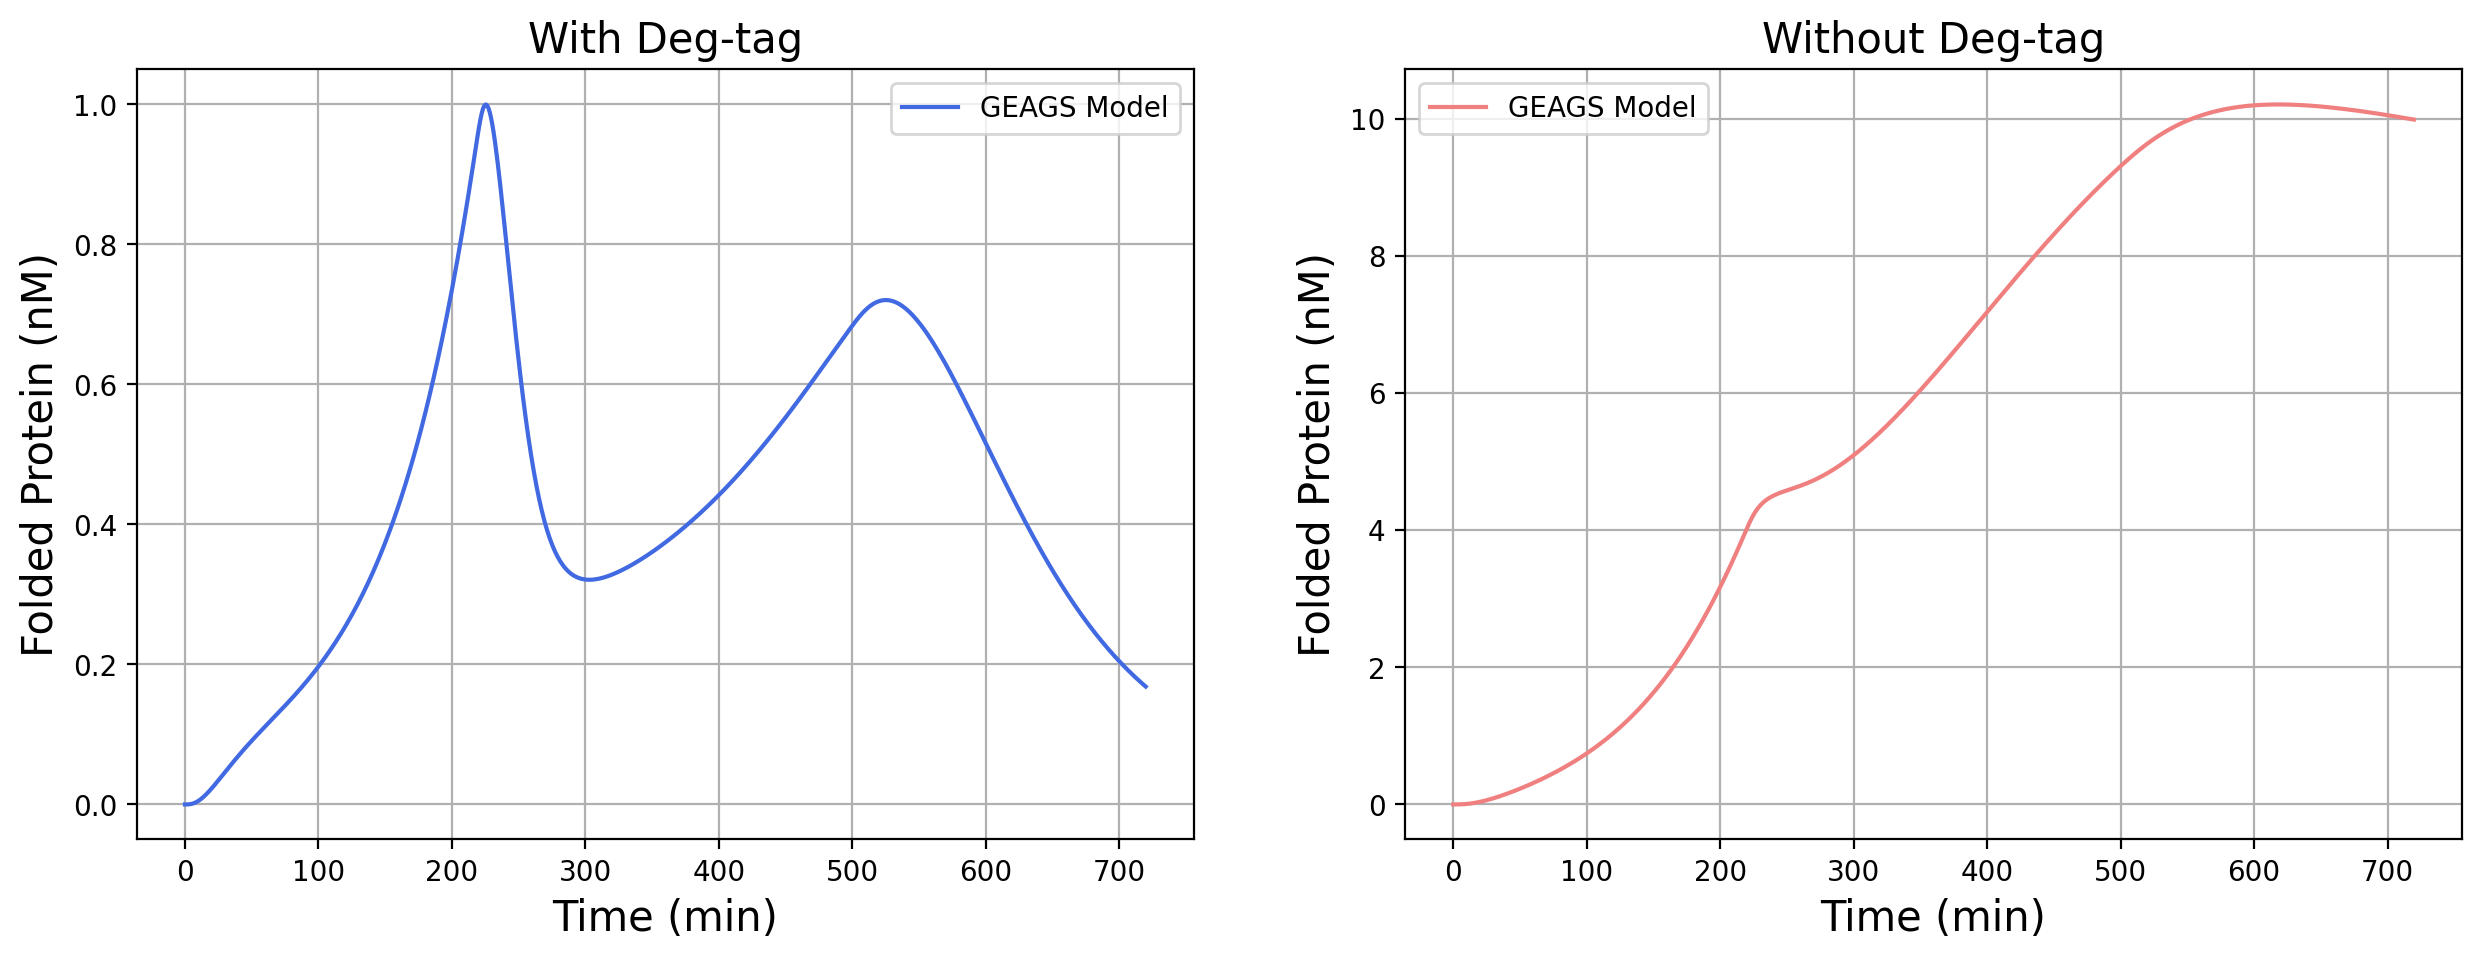

In [48]:
# Plot the initial model output to verify the parameters 

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)


i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_sfYFP'][:tf_I]/np.max(sol_deg['protein_sfYFP']), label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_sfYFP'][:tf_I]/np.max(sol_deg['protein_sfYFP']), label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


### Plotting the phase diagrams: 
We can estimate the rate of change of protein concentration (dP/dt) from the simulation data using the numpy's gradient estimator function:

Text(0.5, 1.0, 'Without deg-tag')

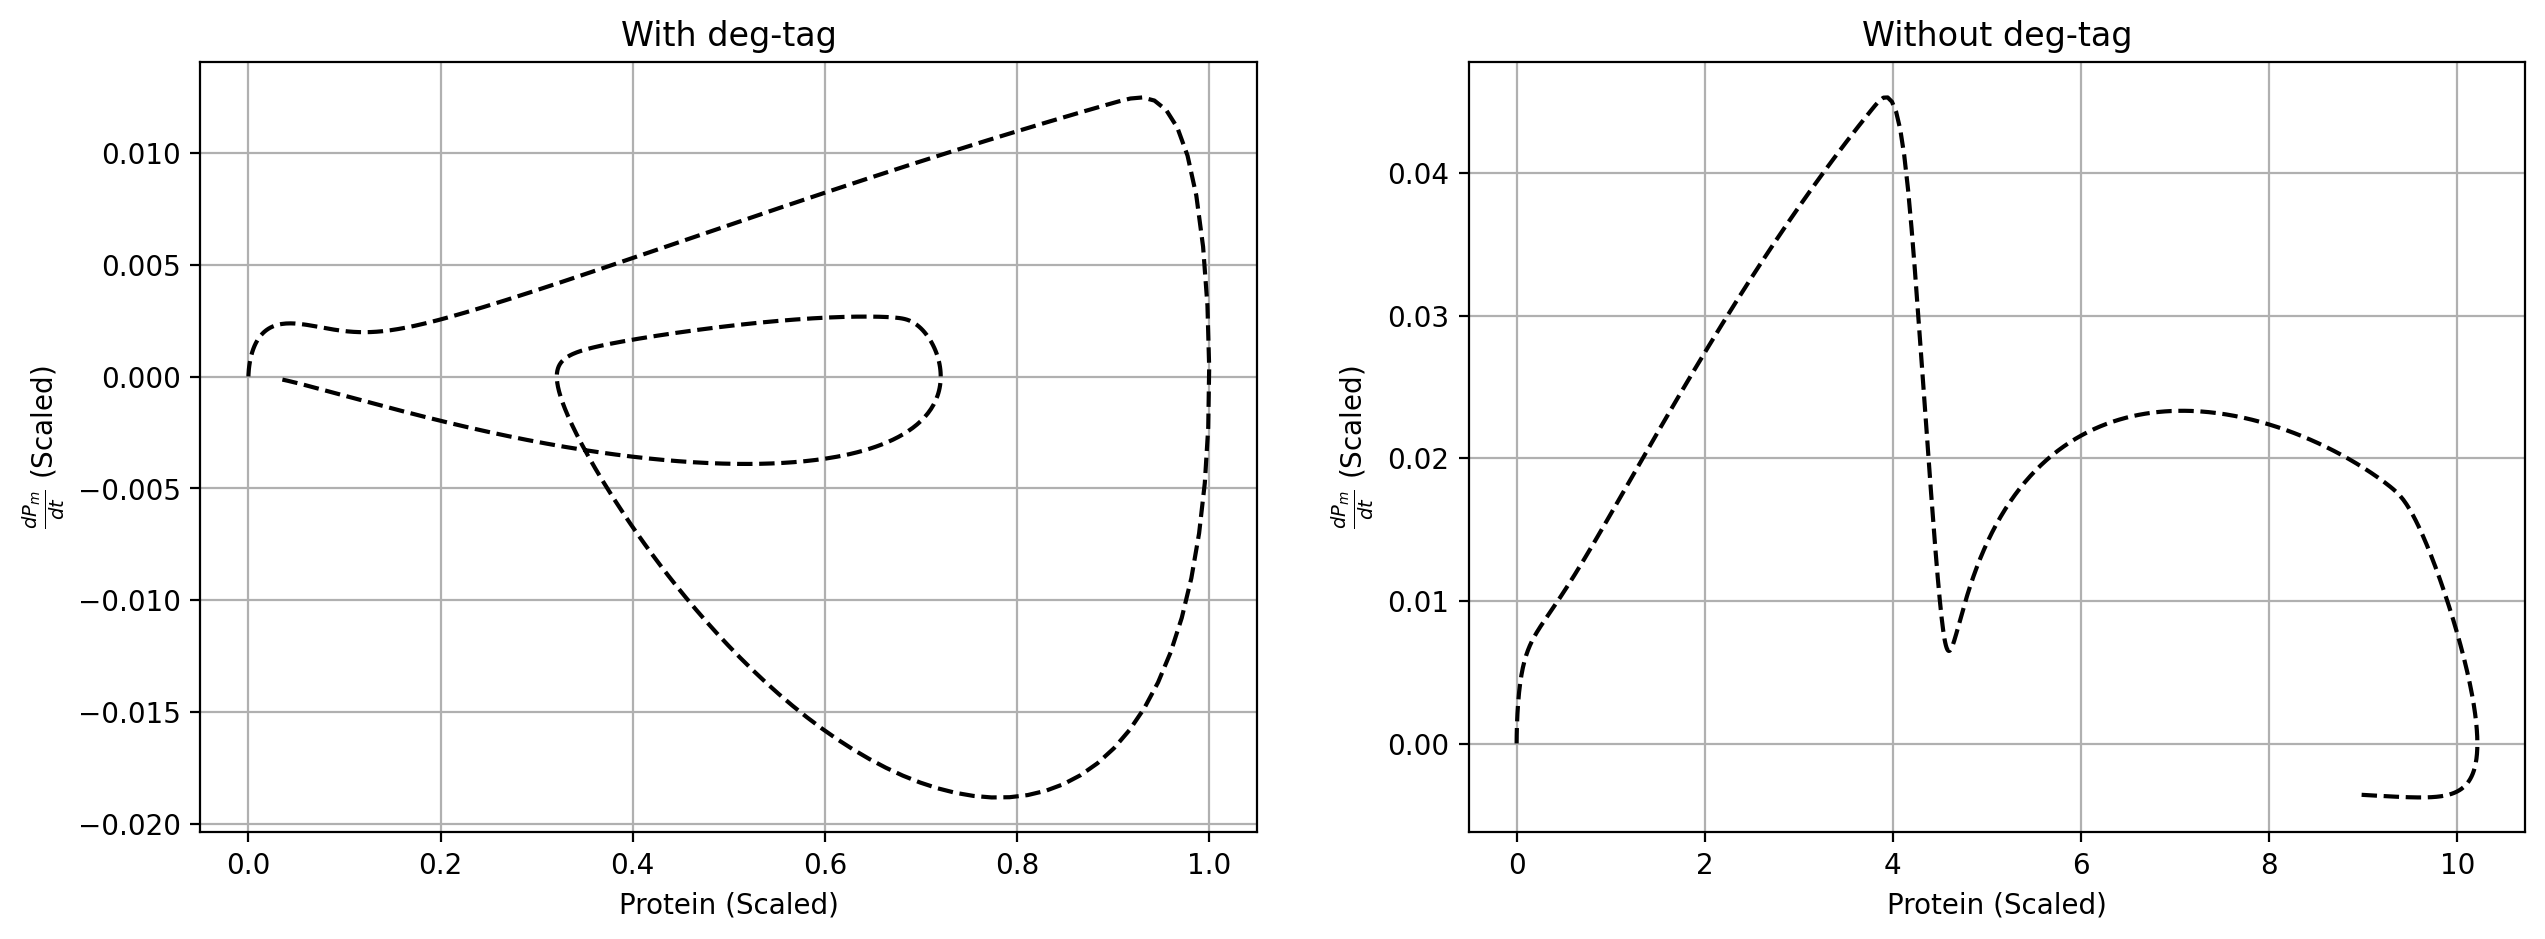

In [49]:
# estimate the gradient from the simulation data 
# Also, scale the protein concentration with the max conc of the deg-tagged sfYFP to get a better 
# comparison of the dynamics when the aboslute conc of protein varies significantly 


dPmdt_deg_CRN = np.gradient(sol_deg['protein_sfYFP']/np.max(sol_deg['protein_sfYFP']))
dPmdt_no_deg_CRN = np.gradient(sol_no_deg['protein_sfYFP']/np.max(sol_deg['protein_sfYFP']))

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.8)
#fig, ax = plt.subplots(2,1, figsize = (8,12))

ax[0].plot(sol_deg['protein_sfYFP']/np.max(sol_deg['protein_sfYFP']),dPmdt_deg_CRN, '--', color = 'black')

ax[0].set_xlabel('Protein (Scaled)'); ax[0].set_ylabel(r'$\frac{dP_{m}}{dt}$ (Scaled)'); ax[0].grid(True) ; 
ax[0].set_title('With deg-tag')

ax[1].plot(sol_no_deg['protein_sfYFP']/np.max(sol_deg['protein_sfYFP']),dPmdt_no_deg_CRN, '--', color = 'black')

ax[1].set_xlabel('Protein (Scaled)'); ax[1].set_ylabel(r'$\frac{dP_{m}}{dt}$ (Scaled)'); ax[1].grid(True) ; 
ax[1].set_title('Without deg-tag')

### Introducing variation of parameters: 
Create an array of input parameters that are varied over a defined interval and defined number of variations, and pass them through the set_params function to generate model trajectories with the varied parameters

In [50]:
# Collect parameter names and units from dictionary to use them while plotting 

param_dict = params.to_dict()

param_names = np.array(list(param_dict.keys()))
# param_array = np.array(list(param_dict.values()))
param_array = p

# Plot the arrays to check
param_names, param_array

(array(['n_gamma_RNAP', 'n_gamma_Et', 'n_gamma_tRNA', 'n_gamma_Ribo',
        'n_gamma_Protease', 'Sigma_IC', 'NT_IC', 'RNAase_IC', 'AA_IC',
        'Ribo_max', 'tRNA_max', 'RNAP_max', 'Et_max', 'Protease_max',
        'k_tx_1b', 'k_tx_1u', 'k_tx_2b', 'k_tx_2u', 'k_tx_3', 'k_tx_4b',
        'k_tx_4u', 'k_tx_5', 'k_tl_1b', 'k_tl_1u', 'k_tl_2u', 'k_tl_2b',
        'k_tl_3b', 'k_tl_3u', 'k_tl_4', 'k_tl_5', 'b_tl_5', 'k_tl_6',
        'k_tl_7', 'k_tl_8', 'k_tl_9b_P', 'k_tl_9b_Pm', 'k_tl_9u',
        'k_tl_10', 'n_gamma_folding', 'n_gamma_syn', 'C_max', 'C_0',
        'k_gr'], dtype='<U16'),
 array([0.23, 0.37, 0.6, 0.67, 0.455, 135.0, 942.0, 90.0, 85610.0, 280.0,
        1535.0, 1960.0, 1090.0, 850.0, 0.05061, 14.081, 0.0019382, 0.09999,
        0.003597, 2.54926, 161.36218, 0.42521, 0.002793, 11.48224, 35.1135,
        8.24109, 0.04287, 12.3438, 0.17, 0.10047, 0.5007, 0.39, 0.0008,
        138.0, 0.000454, 0.01671, 10.2873, 0.0001, 0.26, 0.296,
        503666666.6666667, 6666666.67, 0.015

In [51]:
# Define the degree of variation we need to observe 

N = 5 # Number of of trajectories
# Uniform sampling done about interval of (p * lower_bound, p * upper_bound)
lower_bound = 0.1
upper_bound = 10
Np = len(param_array)

# param_space_transpose = np.linspace((param_array * lower_bound), (param_array * upper_bound), N)

# Picking parameters from a log space
param_space = np.array([
    np.logspace(np.log10(p * lower_bound), np.log10(p * upper_bound), N)
    for p in param_array
])

# param_space = np.transpose(param_space_transpose)
# Check shape to make sure its correct, if not then transpose using above commented code
np.shape(param_space)

(43, 5)

In [52]:
# Define the result array to store the results 

protein_deg_array = np.zeros((Np, N, N_steps))
protein_no_deg_array = np.zeros((Np, N, N_steps))

dPmdt_deg_array = np.zeros((Np, N, N_steps))
dPmdt_no_deg_array = np.zeros((Np, N, N_steps))

In [53]:
# Generate the profiles with range of parameters
for j in range(Np):
    for i in range(N):
        
        param_i = [param_array[index] for index in range(len(param_array))]
        param_i[j] = param_space[j,i]
        param_new = set_params(param_i)

        # Suppress warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            sol_deg_new, sol_no_deg_new = run_CRN_model(param_new, model_degtag, model_no_tag, timepoints)

        protein_deg_array[j,i,:] = sol_deg_new['protein_sfYFP']/np.max(sol_deg_new['protein_sfYFP'])
        protein_no_deg_array[j,i,:] = sol_no_deg_new['protein_sfYFP']/np.max(sol_deg_new['protein_sfYFP'])

        dPmdt_deg = np.gradient(sol_deg_new['protein_sfYFP'])/np.max(sol_deg_new['protein_sfYFP']) 
        dPmdt_no_deg = np.gradient(sol_no_deg_new['protein_sfYFP'])/np.max(sol_deg_new['protein_sfYFP']) 

        dPmdt_deg_array[j,i,:] = dPmdt_deg
        dPmdt_no_deg_array[j,i,:] = dPmdt_no_deg

In [54]:
# Also another way to save the trajectories if we want to export them 
## I added this step in case we need to run the analysis repeatedly (just for plotting purposes) and don't want to simulate the CRN again and again as it can take time


# np.save("protein_deg_array_50_percent.npy", protein_deg_array)
# np.save("protein_no_deg_array_50_percent.npy", protein_no_deg_array)

# np.save("dPmdt_deg_array_50_percent.npy", dPmdt_deg_array)
# np.save("dPmdt_no_deg_array_50_percent.npy", dPmdt_no_deg_array)

In [55]:
# Load the exported result array 
# protein_deg_array = np.load('protein_deg_array_50_percent.npy')
# protein_no_deg_array = np.load('protein_no_deg_array_50_percent.npy')

# dPmdt_deg_array = np.load('dPmdt_deg_array_50_percent.npy')
# dPmdt_no_deg_array = np.load('dPmdt_no_deg_array_50_percent.npy')

Text(0.5, 0.91, 'Phase portraits of sfYFP-ssrA with variation of parameters')

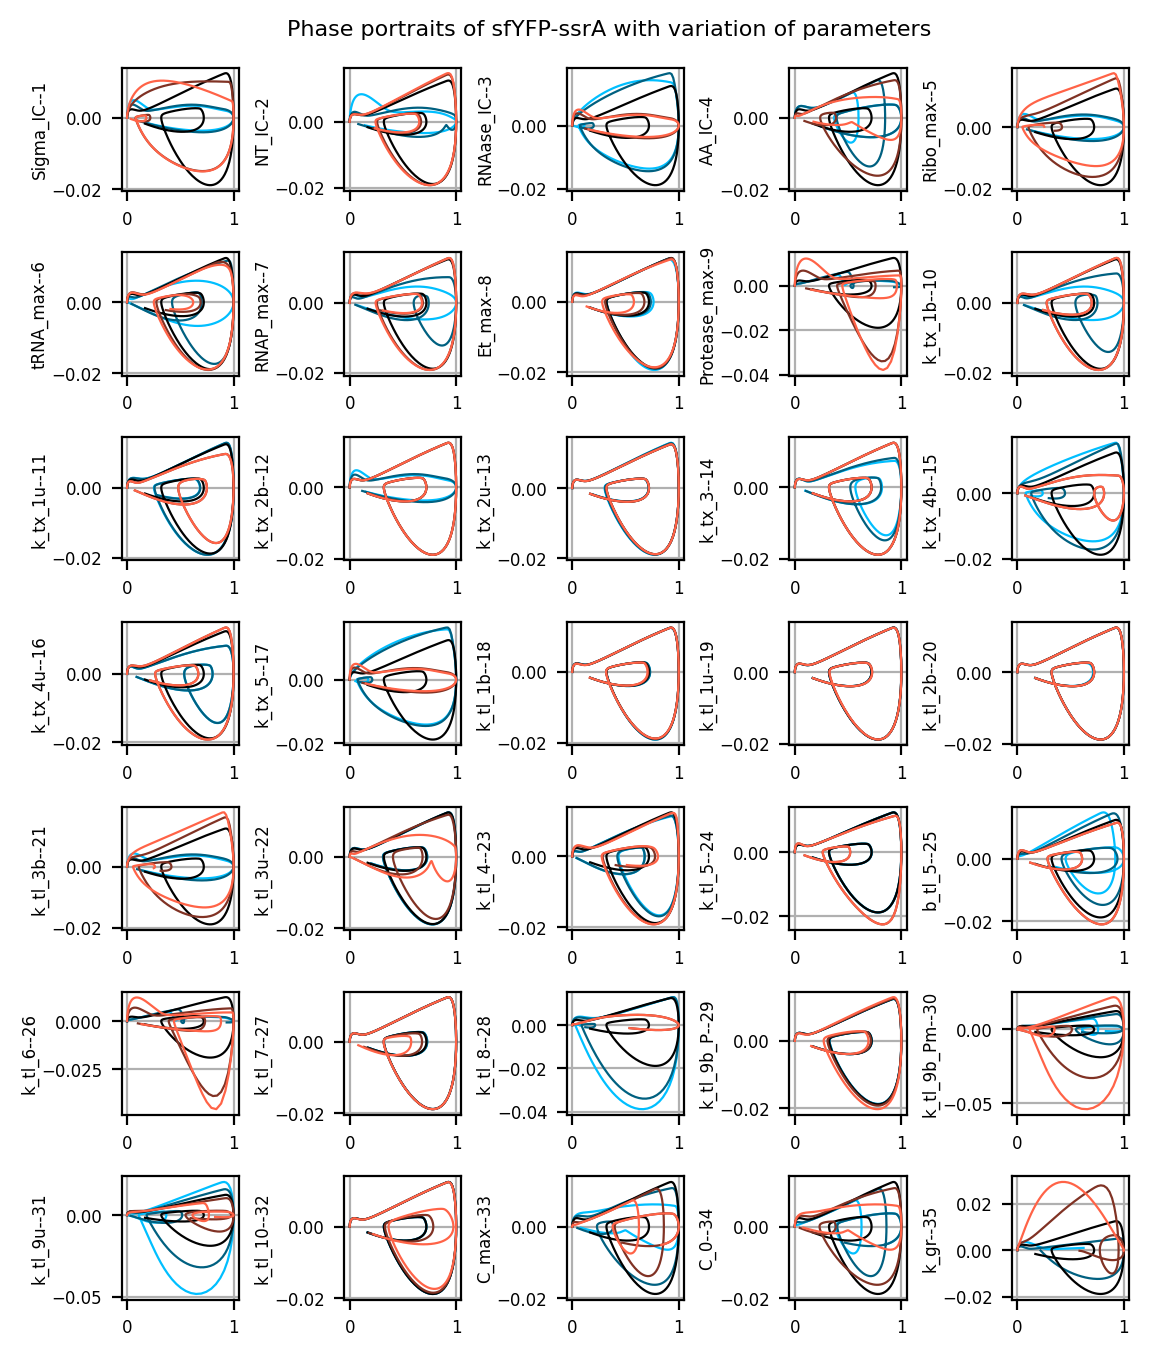

In [56]:
# Plotting all the phase portraits
# Np = total number of parameters
# N = number of trajectories per plot
# tf_I = time frame length

# Skip indices that are not being considered in the analysis (the powers of different gamma and unbinding rate of C_t which is not used in the model)
skip_indices = [0, 1, 2, 3, 4, 24, 38, 39]
used_indices = [j for j in range(Np) if j not in skip_indices]
num_plots = len(used_indices)

# Calculate subplot grid size (roughly square layout)
ncols = 5
nrows = int(np.ceil(num_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(6.5, 8))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Create a custom colormap with black at the center
# colors = ["blue", "white", "black", "white", "red"]  # Define the color range
colors = ["deepskyblue", "black", "tomato"]  # Define the color range
n_bins = 5  # Number of bins for the colormap
colormap = LinearSegmentedColormap.from_list("center_black", colors, N=n_bins)
#colormap = plt.cm.get_cmap('coolwarm', N)

#lwd = 0.5 # Use smaller linewidth (stroke width) for publication
lwd = 0.8

# Create a scalar mappable for the color bar with the custom colormap
norm = Normalize(vmin=0, vmax=N-1)  # Normalize values between 0 and N-1
sm = plt.cm.ScalarMappable(cmap = colormap, norm = norm)
sm.set_array([])  # This is needed for the colorbar to work

# Plot each used index
param_num = 1
for idx, j in enumerate(used_indices):
    ax = axes[idx]
    for i in range(N):
        ax.plot(protein_deg_array[j, i, :tf_I], dPmdt_deg_array[j, i, :tf_I], color=colormap(i / N), linewidth=lwd)
    ax.set_ylabel(param_names[j] + '--' + str(param_num), fontsize=6, labelpad=1)  # Reduced labelpad
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=6)
    param_num += 1

# Hide any remaining empty axes
for k in range(num_plots, len(axes)):
    fig.delaxes(axes[k])

fig.subplots_adjust(wspace=0.9, hspace=0.5)
fig.suptitle('Phase portraits of sfYFP-ssrA with variation of parameters', fontsize=8, y=0.91)
#fig.savefig("simulation_results/All_phase_portraits_degtag.svg", dpi=300, bbox_inches='tight')


Parameters are divided into 3 categories: <br>
(1) Species related - ones that affect the total conc of species  <br>
(2) CRN related - ones that are rate constants of the CRN reactions  <br>
(3) Growth related - logistic growth parameters 

In [57]:
# Specify the indices of parameters that you want to analyze closely 

spec_ind_species = range(5,14)
spec_ind_CRN = range(14,38)
spec_ind_growth = range(40,43)

Text(0.5, 0.91, 'Phase portraits with variation of species-parameters with deg-tag')

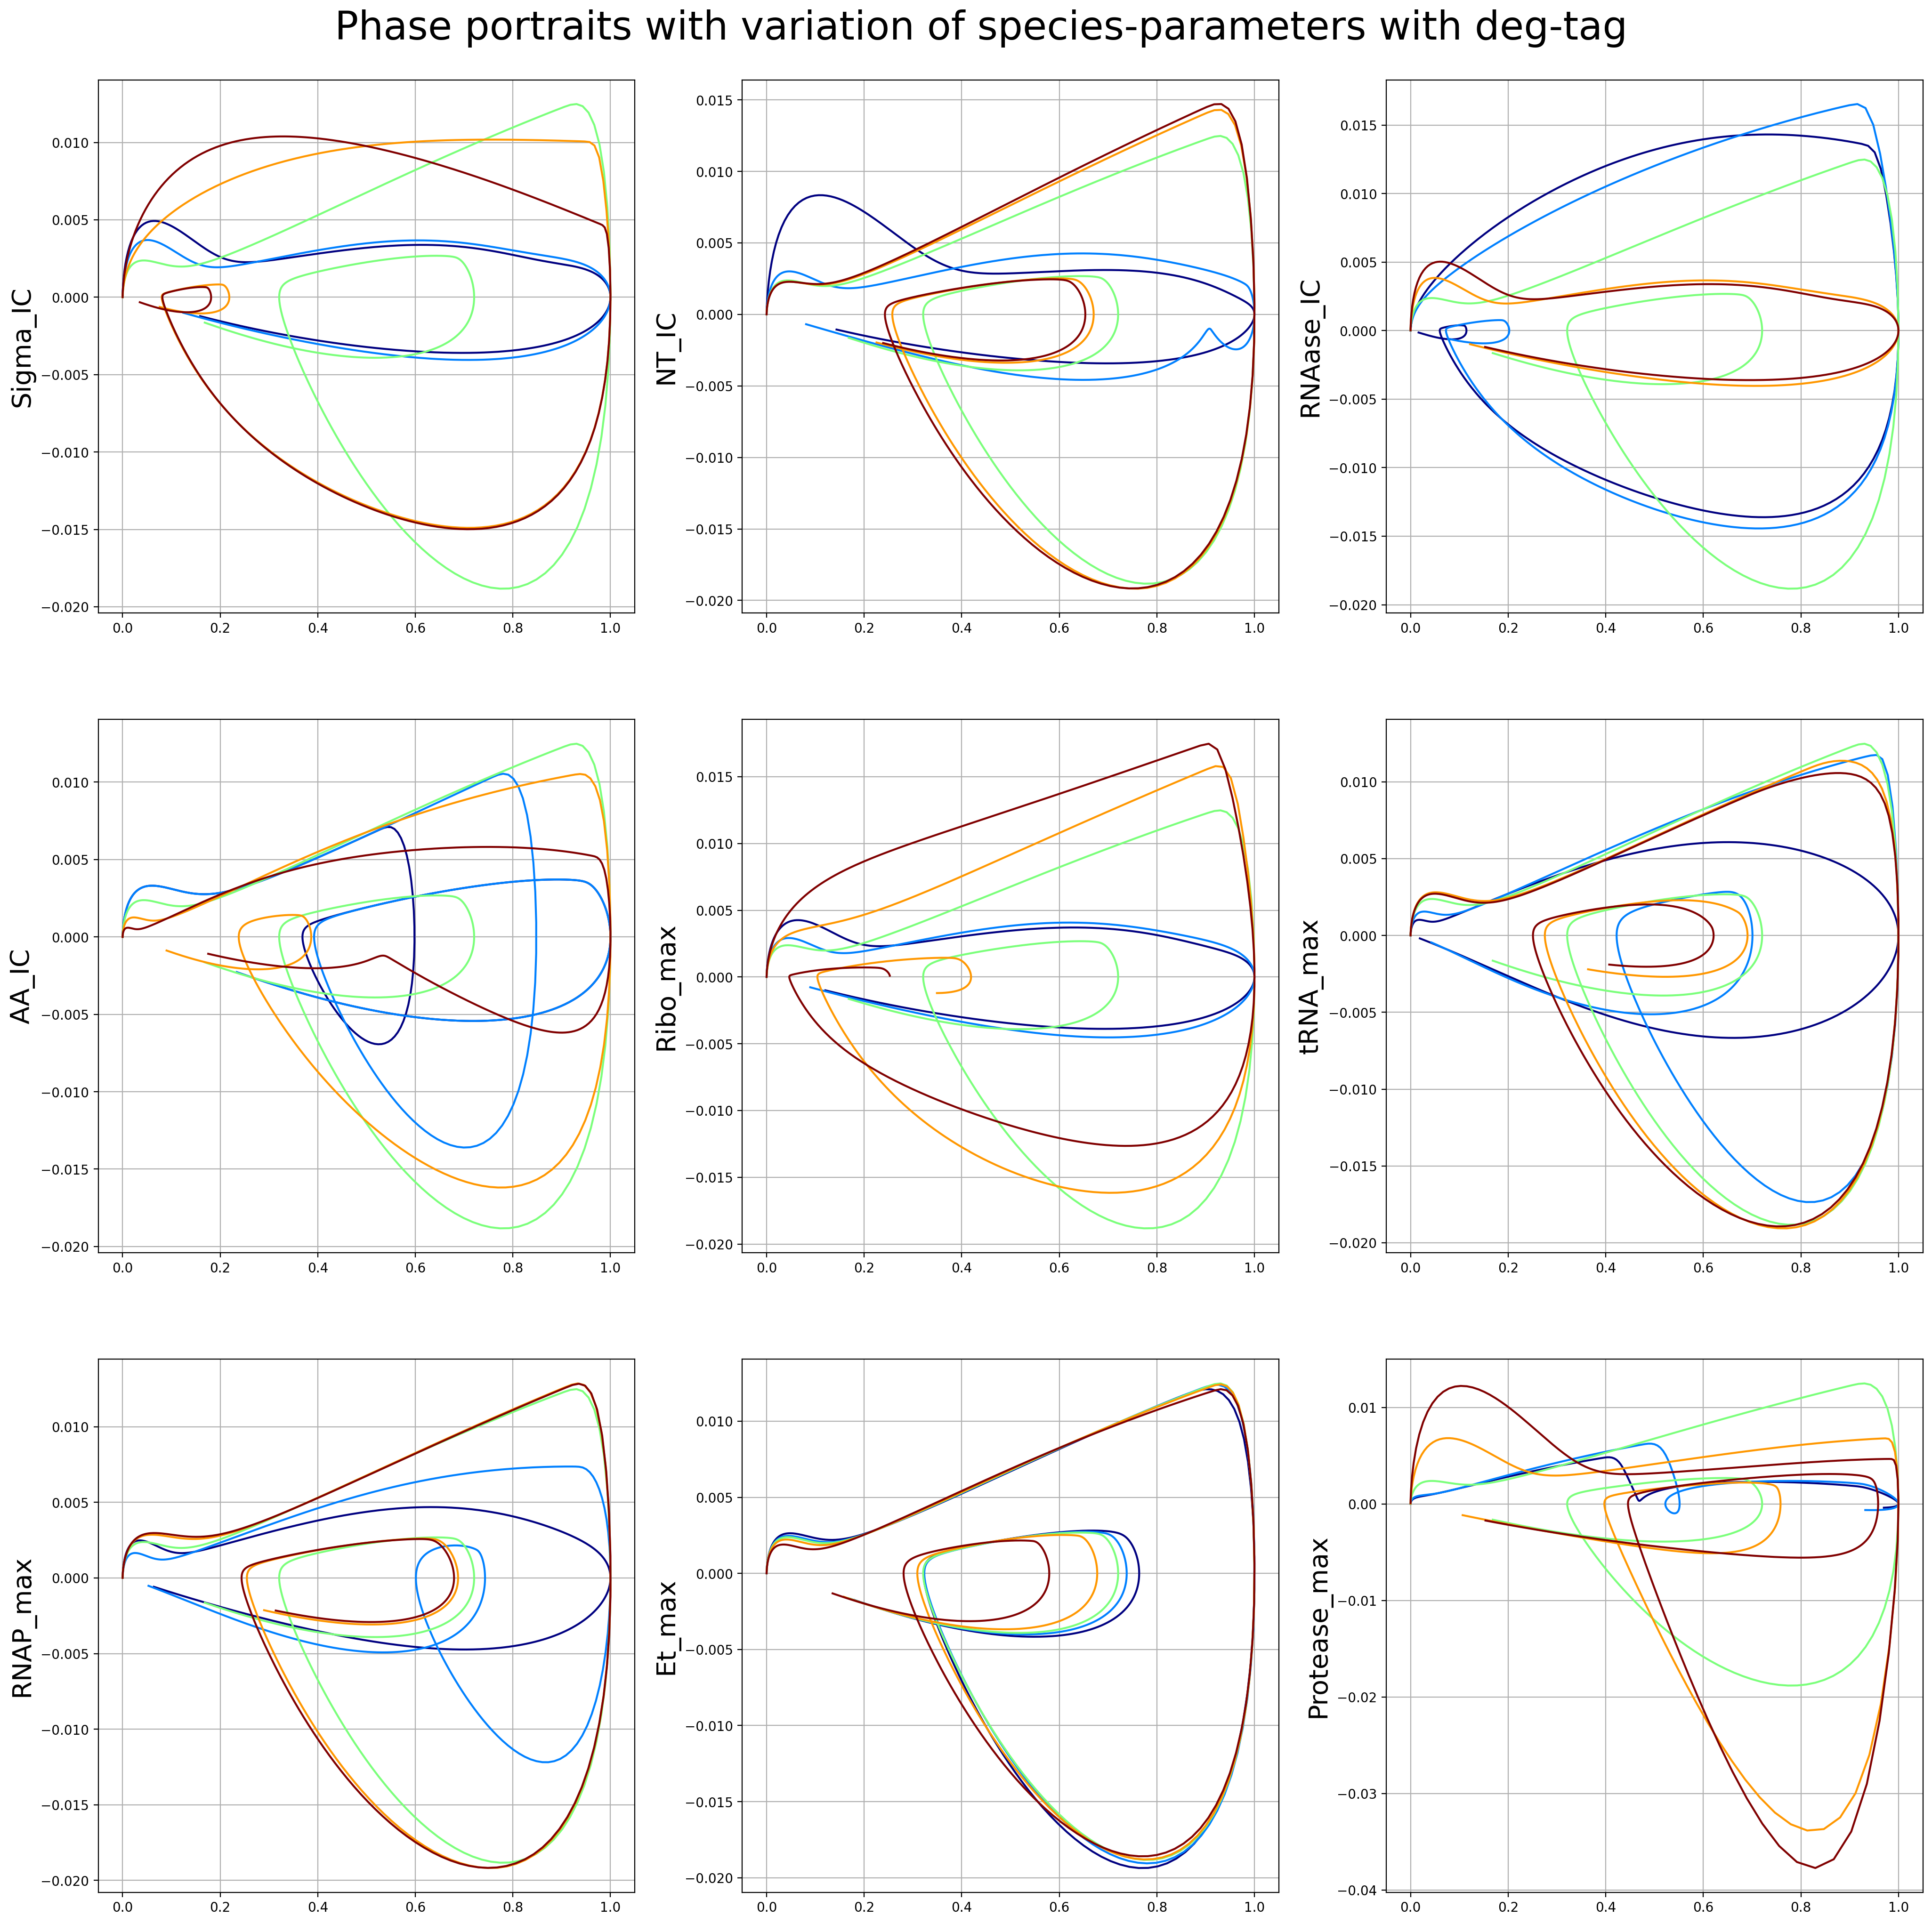

In [58]:
## Plot the species related parameters 

num_plots = len(spec_ind_species)

# Calculate subplot grid size
ncols = 3
nrows = int(np.ceil(num_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 25))
axes = axes.flatten()

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Colormap
colormap = plt.cm.get_cmap('jet', N)

# Plot each species-related parameter
for idx, j in enumerate(spec_ind_species):
    ax = axes[idx]
    for i in range(N):
        ax.plot(protein_deg_array[j, i, :tf_I], dPmdt_deg_array[j, i, :tf_I], color=colormap(i / N))
    ax.set_ylabel(param_names[j], fontsize=20)
    ax.grid(True)

# Remove unused subplots
for k in range(num_plots, len(axes)):
    fig.delaxes(axes[k])

fig.suptitle('Phase portraits with variation of species-parameters with deg-tag', fontsize = 30, y = 0.91)

Text(0.5, 0.91, 'Phase portraits with variation of CRN-parameters with deg-tag ')

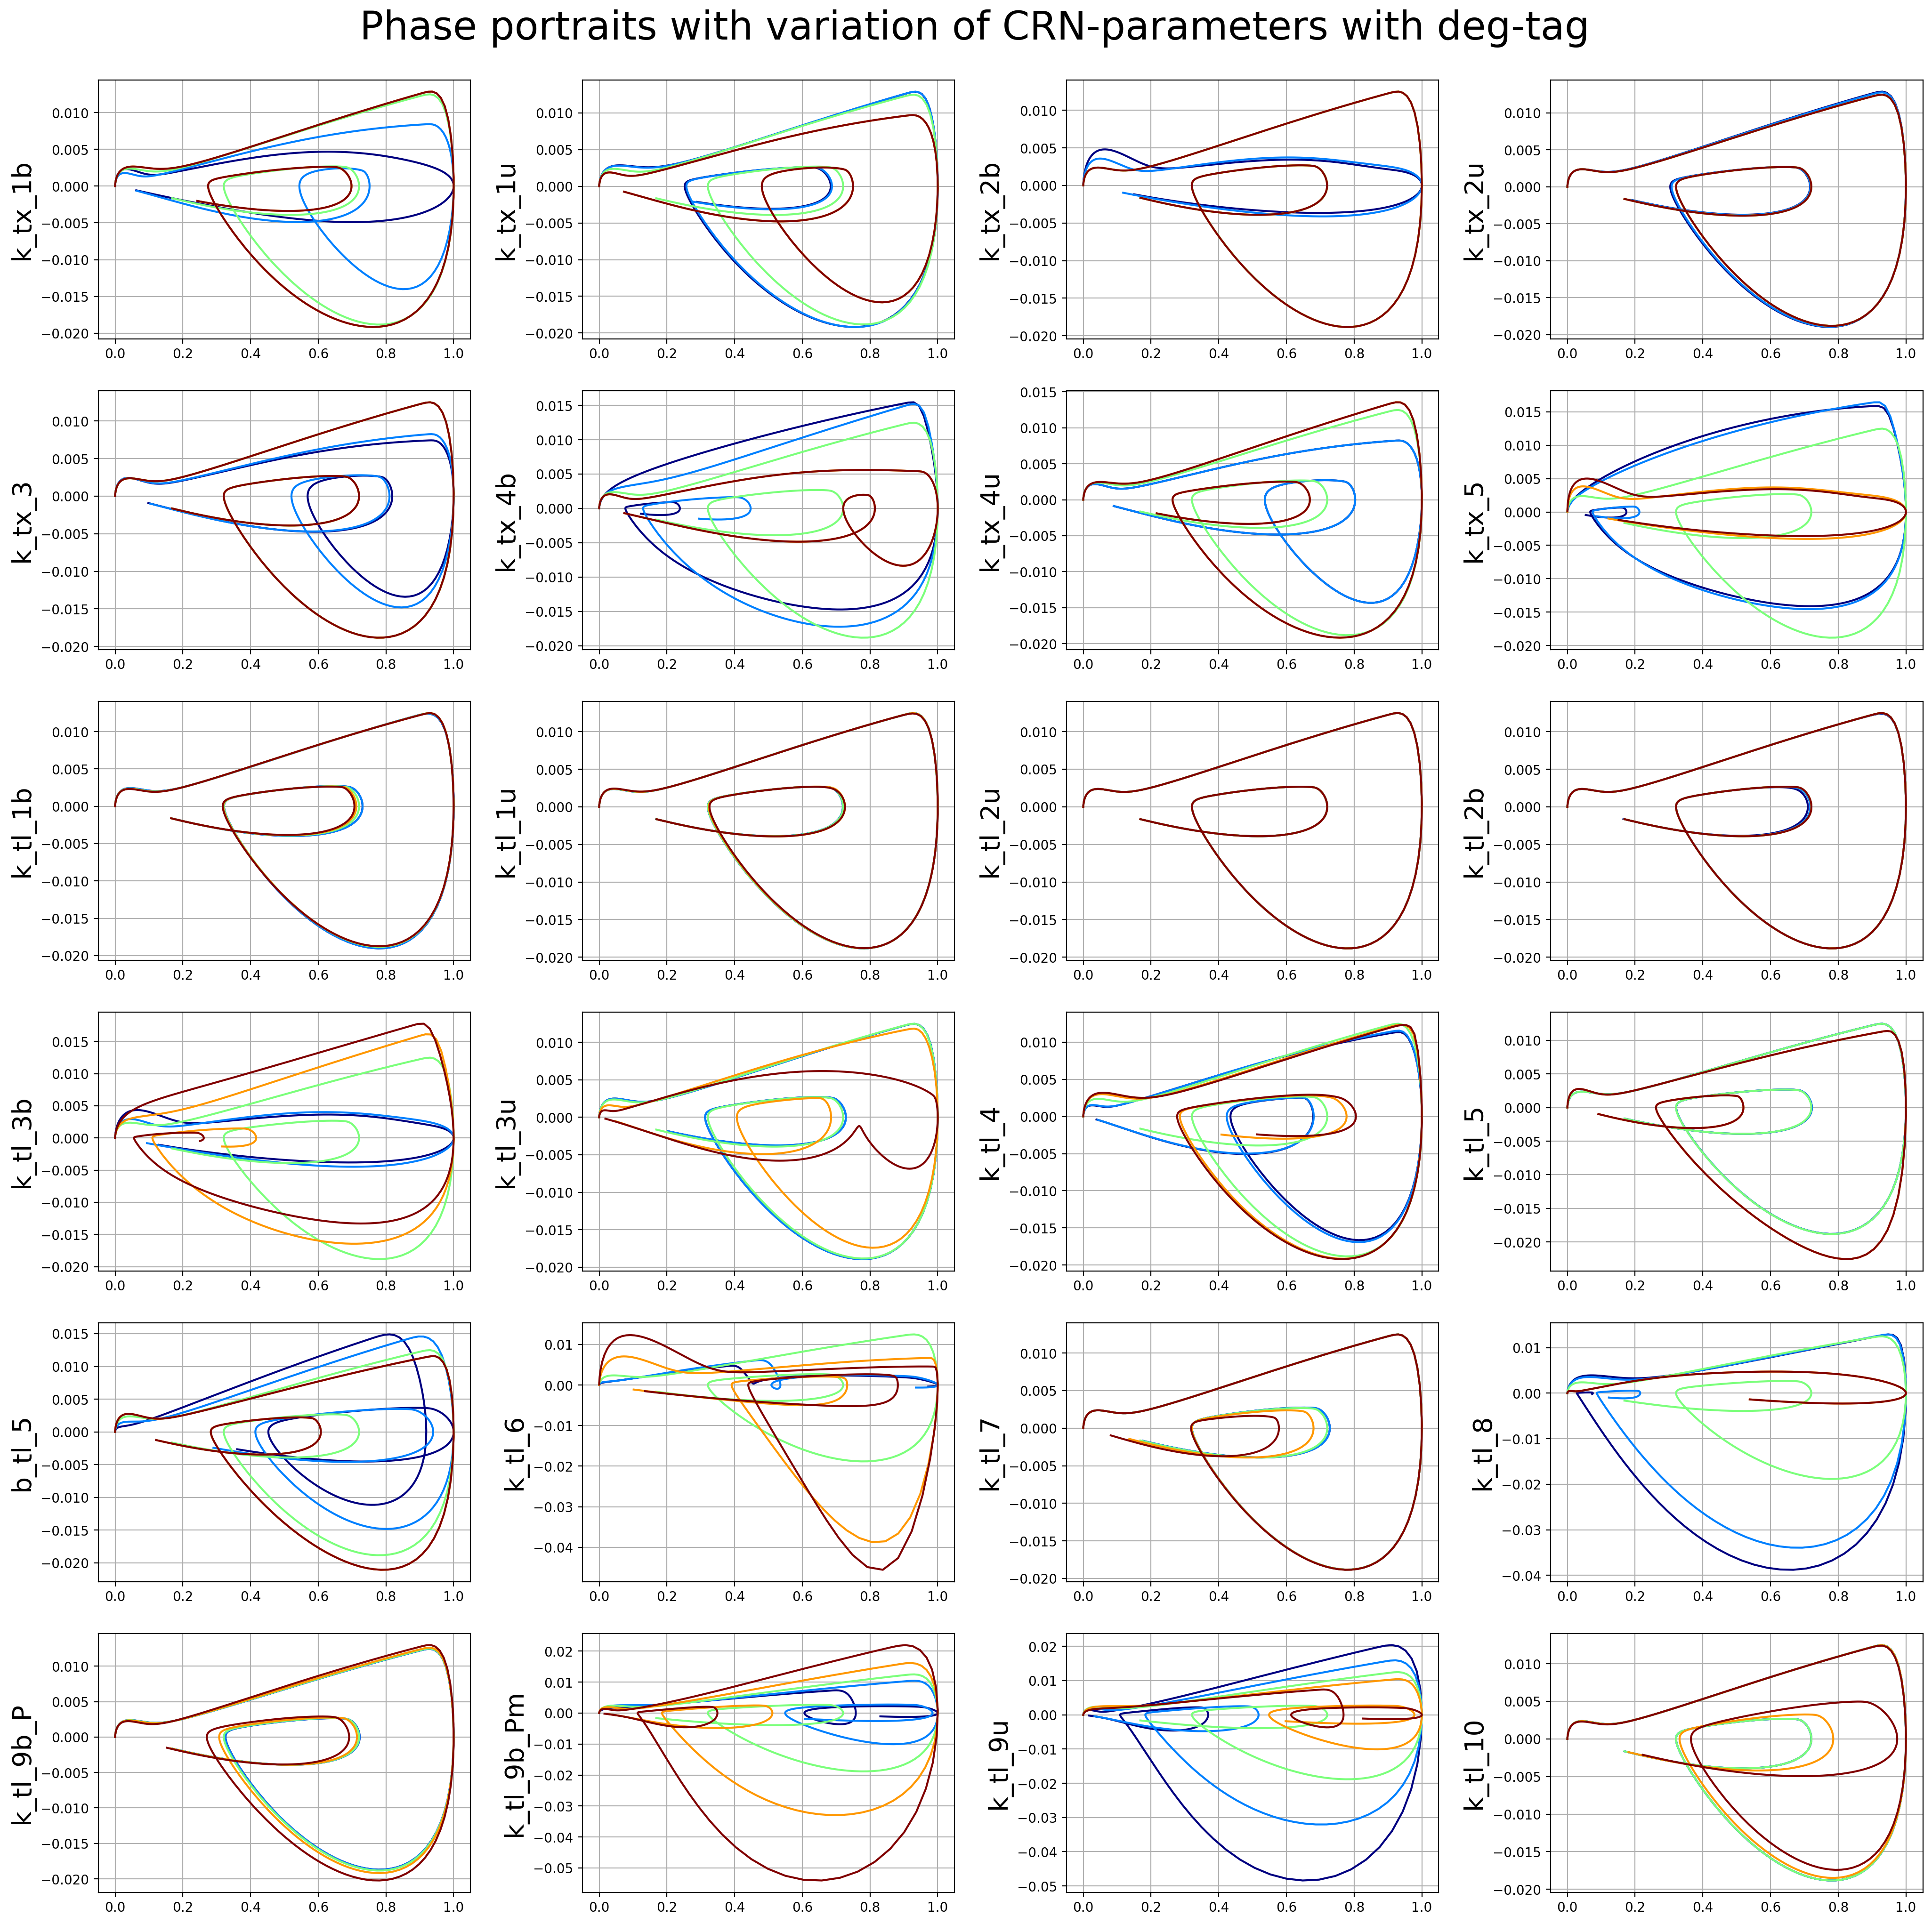

In [59]:
## Plot the species related parameters 

num_plots = len(spec_ind_CRN)

# Calculate subplot grid size
ncols = 4
nrows = int(np.ceil(num_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 25))
axes = axes.flatten()

fig.subplots_adjust(wspace=0.3, hspace=0.2)

# Colormap
colormap = plt.cm.get_cmap('jet', N)

# Plot each species-related parameter
for idx, j in enumerate(spec_ind_CRN):
    ax = axes[idx]
    for i in range(N):
        ax.plot(protein_deg_array[j, i, :tf_I], dPmdt_deg_array[j, i, :tf_I], color=colormap(i / N))
    ax.set_ylabel(param_names[j], fontsize=20)
    ax.grid(True)

# Remove unused subplots
for k in range(num_plots, len(axes)):
    fig.delaxes(axes[k])

fig.suptitle('Phase portraits with variation of CRN-parameters with deg-tag ', fontsize = 30, y = 0.91)

Text(0.5, 0.91, 'Phase portraits with variation of growth-parameters with deg-tag ')

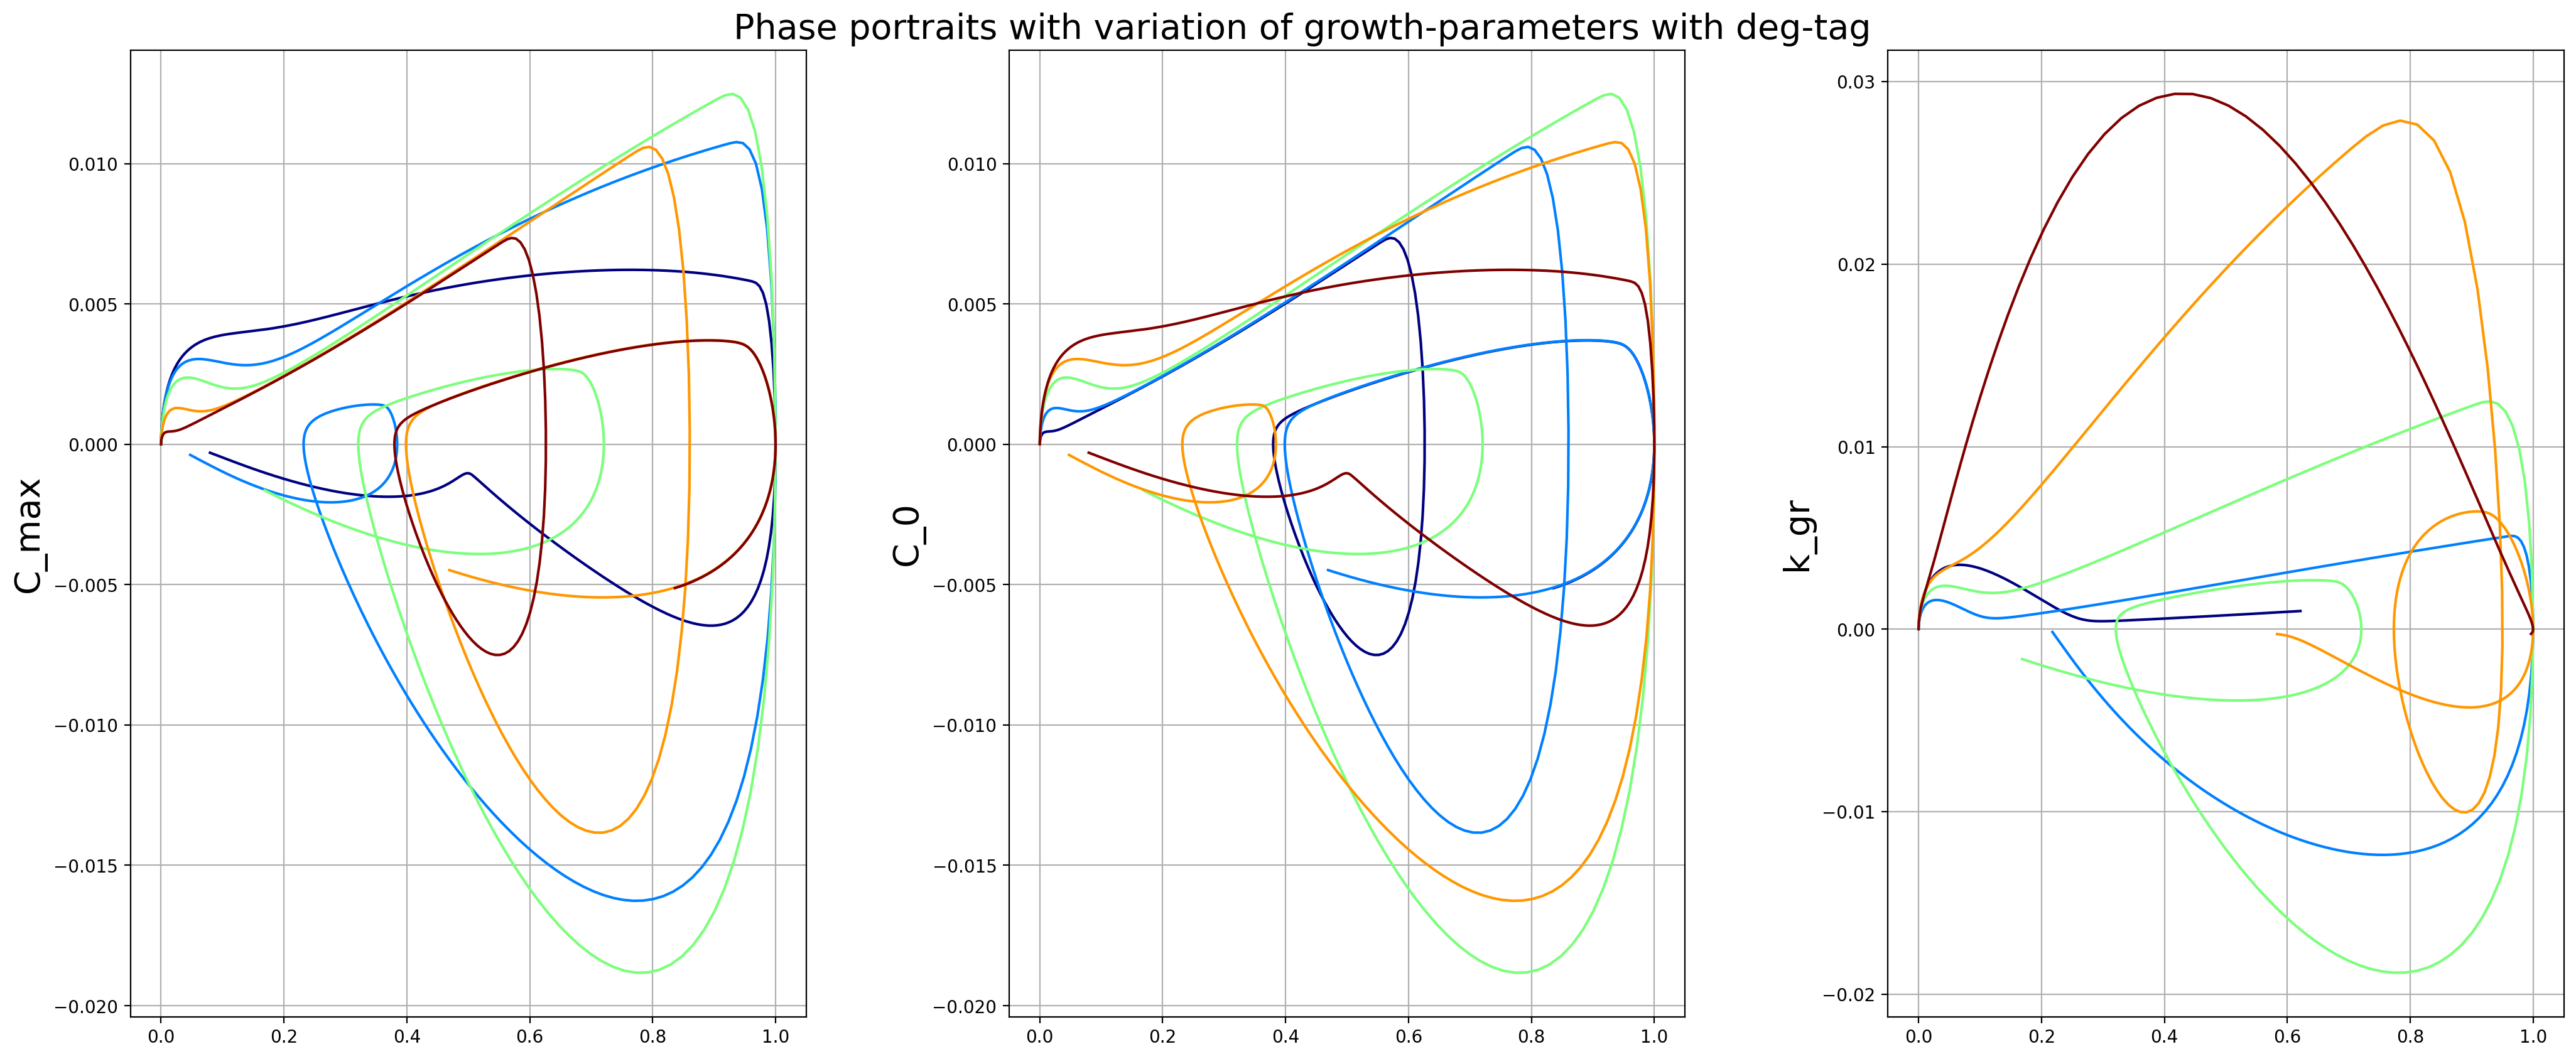

In [60]:
## Supress matlab deprecation warnings
warnings.filterwarnings("ignore")

## Plot the growth related parameters 

num_plots = len(spec_ind_growth)

# Calculate subplot grid size
ncols = 3
nrows = int(np.ceil(num_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 10))
axes = axes.flatten()

fig.subplots_adjust(wspace=0.3, hspace=0.2)

# Colormap
colormap = plt.cm.get_cmap('jet', N)

# Plot each species-related parameter
for idx, j in enumerate(spec_ind_growth):
    ax = axes[idx]
    for i in range(N):
        ax.plot(protein_deg_array[j, i, :tf_I], dPmdt_deg_array[j, i, :tf_I], color=colormap(i / N))
    ax.set_ylabel(param_names[j], fontsize=20)
    ax.grid(True)

# Remove unused subplots
for k in range(num_plots, len(axes)):
    fig.delaxes(axes[k])

fig.suptitle('Phase portraits with variation of growth-parameters with deg-tag ', fontsize = 20, y = 0.91)

In [61]:
# Obtain all the indices of parameters for printing purposes

for i in range(len(param_array)):
    print(i, param_names[i])

0 n_gamma_RNAP
1 n_gamma_Et
2 n_gamma_tRNA
3 n_gamma_Ribo
4 n_gamma_Protease
5 Sigma_IC
6 NT_IC
7 RNAase_IC
8 AA_IC
9 Ribo_max
10 tRNA_max
11 RNAP_max
12 Et_max
13 Protease_max
14 k_tx_1b
15 k_tx_1u
16 k_tx_2b
17 k_tx_2u
18 k_tx_3
19 k_tx_4b
20 k_tx_4u
21 k_tx_5
22 k_tl_1b
23 k_tl_1u
24 k_tl_2u
25 k_tl_2b
26 k_tl_3b
27 k_tl_3u
28 k_tl_4
29 k_tl_5
30 b_tl_5
31 k_tl_6
32 k_tl_7
33 k_tl_8
34 k_tl_9b_P
35 k_tl_9b_Pm
36 k_tl_9u
37 k_tl_10
38 n_gamma_folding
39 n_gamma_syn
40 C_max
41 C_0
42 k_gr


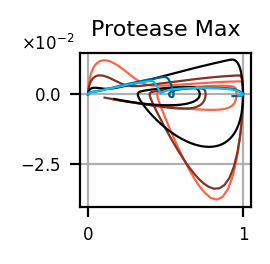

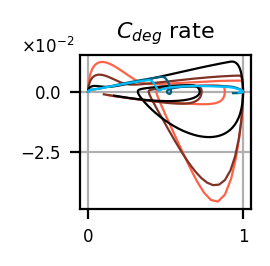

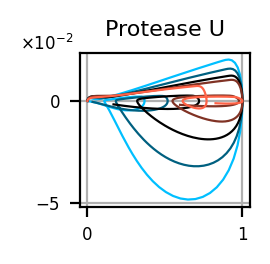

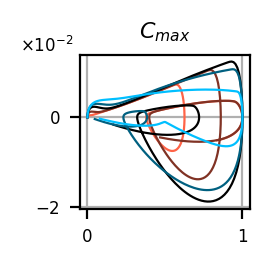

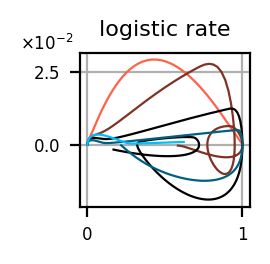

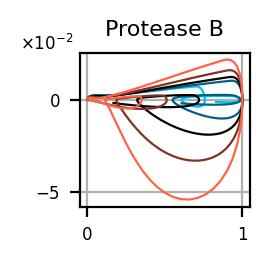

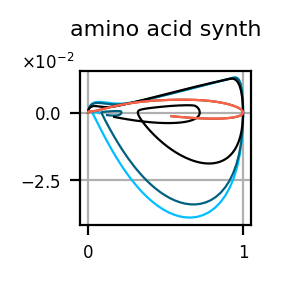

In [62]:
# Code to export high quality images 

inds_to_print = [13, 31, 36, 40, 42, 35, 33]
names_to_print = ["Protease Max", "$C_{deg}$ rate",
                  "Protease U", r"$C_{max}$", "logistic rate", "Protease B", "amino acid synth"]
reverse_inds = [13, 31, 40, 42]  # List of indices you want reversed

for j in range(len(inds_to_print)): # I used the commented for loop statement below to plot single panels manually (if needed)
# for j in range(1):
    #mm = 1/2.54/10  # centimeters in inches
    fig, axs = plt.subplots(1,1, figsize = (1.1, 1))#, sharex = 'col') # Use smaller figure size for publication
    #fig, axs = plt.subplots(1,1, figsize = (4, 4))#, sharex = 'col')


    # param_ind = 13  # look up the indice of wanted parameter
    param_ind = inds_to_print[j]  # look up the indice of wanted parameter

    # Create a custom colormap with black at the center
    # colors = ["blue", "white", "black", "white", "red"]  # Define the color range
    colors = ["deepskyblue", "black", "tomato"]  # Define the color range
    n_bins = 5  # Number of bins for the colormap
    colormap = LinearSegmentedColormap.from_list("center_black", colors, N=n_bins)
    #colormap = plt.cm.get_cmap('coolwarm', N)

    lwd = 0.8 # Use smaller linewidth (stroke width) for publication
    #lwd = 1

    # Create a scalar mappable for the color bar with the custom colormap
    norm = Normalize(vmin=0, vmax=N-1)  # Normalize values between 0 and N-1
    sm = plt.cm.ScalarMappable(cmap = colormap, norm = norm)
    sm.set_array([])  # This is needed for the colorbar to work
    
    # Determine the order of plotting
    order = reversed(range(N)) if param_ind in reverse_inds else range(N)

    

    for i in order:
                if i == 2:
                    p00 = p00 = axs.plot(protein_deg_array[param_ind,i,:][:tf_I], dPmdt_deg_array[param_ind,i,:][:tf_I], color = 'k', linewidth = lwd)
                else:
                    p00 = axs.plot(protein_deg_array[param_ind,i,:][:tf_I], dPmdt_deg_array[param_ind,i,:][:tf_I], color = colormap(i/N), linewidth = lwd)
    
                #axs.plot(sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), dPmdt_deg_CRN[:tf_I], color = 'k', linewidth = lwd)
                ticks_font_size = 6
                title_fontsize = 8
                
                axs.grid(True)
                axs.set_title(names_to_print[j], fontsize = title_fontsize)
                
                axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
                axs.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
                # Customize the exponent font size and position
                offset_text = axs.yaxis.get_offset_text()
                offset_text.set_fontsize(6)  # Adjust exponent font size
                offset_text.set_va('center')  # Align vertically (bottom, center, top)
                offset_text.set_position((-0.35, 1.5))  # Move exponent horizontally (-0.1) and vertically (-0.1)

                plt.xticks(fontsize = ticks_font_size) ; plt.yticks(fontsize = ticks_font_size)
                #fig.savefig("simulation_results/" + names_to_print[j] + ".svg", dpi = 300, bbox_inches = 'tight')

    # # Add the color bar
    # cbar = plt.colorbar(sm, ax=axs, orientation='vertical')
    # # Hide the ticks (numbers) on the colorbar
    # cbar.set_ticks([])
    

    #Save the figure
    #fig.savefig("simulation_results/Sample_fig_with_cbar.svg", dpi = 300, bbox_inches = 'tight') ## If only one figure is needed

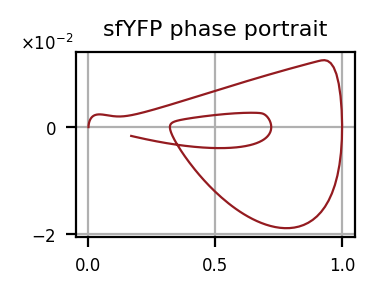

In [63]:
## Supress matlab deprecation warnings
warnings.filterwarnings("ignore")
## Plotting the sfYFP phase diagram 

#mm = 1/2.54/10  # centimeters in inches
fig, axs = plt.subplots(1,1, figsize = (1.8, 1.2))#, sharex = 'col')

param_ind = 36  # look up the indice of wanted parameter
name_to_print = "sfYFP phase portrait"


# Create a colormap to generate a sequence of distinct colors
colormap = plt.cm.get_cmap('viridis', N)

lwd = 0.8

# for i in range(N):
#             p00 = axs.plot(protein_deg_array[param_ind,i,:], dPmdt_deg_array[param_ind,i,:], color = colormap(i/N), linewidth = lwd)
p00 = axs.plot(sol_deg['protein_sfYFP'][:tf_I]/np.max(sol_deg['protein_sfYFP']), dPmdt_deg_CRN[:tf_I], color = '#941b20', linewidth = lwd)

axs.grid(True)
#axs.set_xlabel('Protein Concentration (scaled)', fontsize = 6)
#axs.set_ylabel('Protein Synthesis Rate', fontsize = 6, labelpad = 1)
# axs.set_title('Varying ' + str(param_names[param_ind]), fontsize = 9)
axs.set_title(name_to_print, fontsize = 8)

plt.xticks(fontsize = 6) ; plt.yticks(fontsize = 6)

axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
# Customize the exponent font size and position
offset_text = axs.yaxis.get_offset_text()
offset_text.set_fontsize(6)  # Adjust exponent font size
offset_text.set_va('center')  # Align vertically (bottom, center, top)
offset_text.set_position((-0.2, 1.5))  # Move exponent horizontally (-0.1) and vertically (-0.1)


#Save the figure
# fig.savefig(simulation_results/ + str(param_names[param_ind]) + '_group_variation.svg', dpi = 300, bbox_inches = 'tight')
fig.savefig("simulation_results/" + name_to_print + ".svg", dpi = 300, bbox_inches = 'tight')